# Author: Hemant
# The Sparks Foundation
# Prediction using Unsupervised ML
# Objective: From the given 'Iris' dataset, predict the optimum number of clusters and repredent it visually.

# Importing the Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset file

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id', axis = 1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Optimum numbers of clusters for kmeans

In [7]:
x = df.iloc[:, [0, 1, 2, 3]].values
random.shuffle(x)

Choosing the number of clusters

WCSS ---> Within Clusters Sum of Squares

WCSS is the sum of squared distance between each point and the centroid in a cluster.

In [8]:
# finding the WCSS value for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, init = 'k-means++', random_state = 242)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

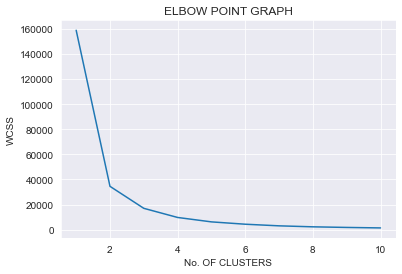

In [9]:
# Plot the elbow graph
sns.set_style(style = 'darkgrid')
plt.plot(range(1, 11), wcss)
plt.title('ELBOW POINT GRAPH')
plt.xlabel('No. OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

From the above graph we choose '3' as the optimum cluster as this is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

# Training the K-Means Cluster model

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 242)

# Making predictions using the model

In [11]:
y = kmeans.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1
 0 2 0 1 2 0 0 2 0 0 0 0 2 2 1 0 0 2 1 2 0 2 2 1 2 2 1 0 1 2 0 1 2 2 2 2 0
 2 2 0 2 2 0 2 1 0 1 2 2 2 2 1 2 0 2 1 2 1 2 1 0 1 2 2 0 2 2 0 0 0 1 2 0 2
 1 2]


# Visualising all the clusters

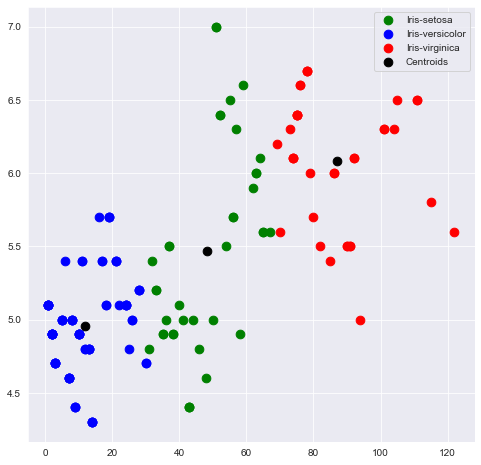

In [12]:
# Plotting all the clusters and their centroids
plt.figure(figsize = (8,8))
plt.scatter(x[y == 0,0], x[y == 0,1], s = 75, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y == 1,0], x[y == 1,1], s = 75, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y == 2,0], x[y == 2,1], s = 75, c = 'red', label = 'Iris-virginica')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'black', label = 'Centroids')

plt.legend()